In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')
%matplotlib inline

df = pd.read_csv("../data/raw/directory/crop_production.csv")


df.head()



,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


In [3]:
# Shape of the dataset
print("Rows:", df.shape[0], "| Columns:", df.shape[1])

# Column names
print("Columns:", df.columns.tolist())

# Data types and null values
df.info()

# Null values summary
df.isnull().sum()


Rows: 345336 | Columns: 8
Columns: ['State', 'District ', 'Crop', 'Crop_Year', 'Season', 'Area ', 'Production', 'Yield']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Crop        345327 non-null  object 
 3   Crop_Year   345336 non-null  int64  
 4   Season      345336 non-null  object 
 5   Area        345336 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       345336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB


State            0
District         0
Crop             9
Crop_Year        0
Season           0
Area             0
Production    4948
Yield            0
dtype: int64

In [5]:
# Drop rows with missing values
df = df.dropna()

# Remove entries with zero production (optional)
df = df[df["Production"] > 0]

# Check cleaned data
df.describe()


,Crop_Year,Area,Production,Yield
count,338918.000000,3.389180e+05,3.389180e+05,338918.000000
mean,2008.905110,1.187657e+04,9.626299e+05,80.926905
std,6.571212,4.621945e+04,2.157723e+07,925.251413
min,1997.000000,8.000000e-03,1.000000e+00,0.000000
25%,2003.000000,8.100000e+01,9.000000e+01,0.570000
50%,2009.000000,5.730000e+02,7.310000e+02,1.030000
75%,2015.000000,4.300000e+03,7.273000e+03,2.510000
max,2020.000000,8.580100e+06,1.597800e+09,43958.330000


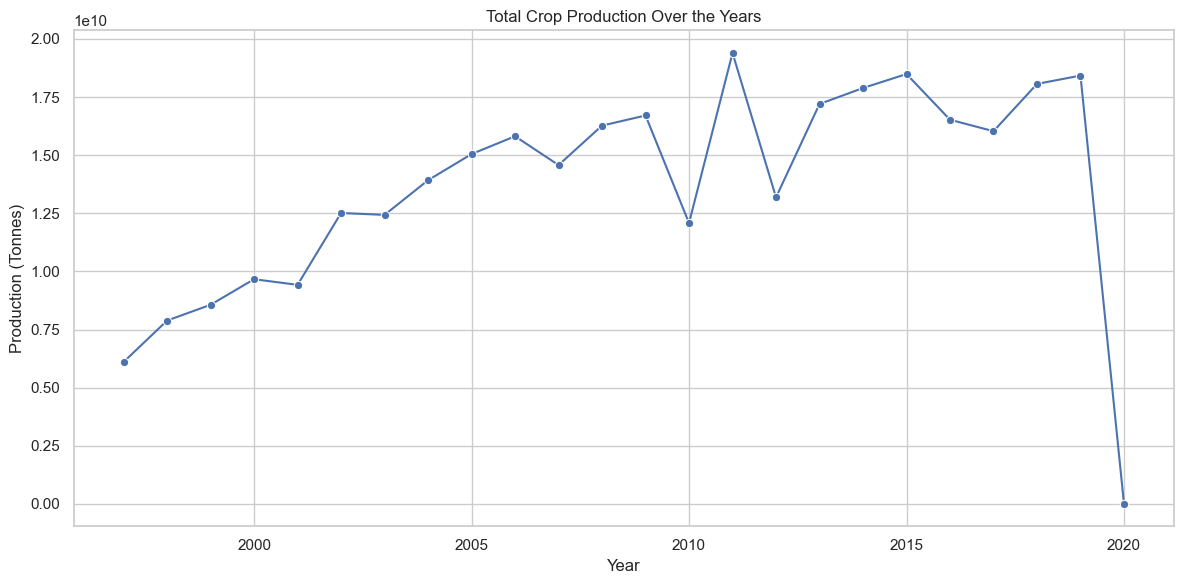

In [6]:
# Average production per year
yearly_prod = df.groupby("Crop_Year")["Production"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="Crop_Year", y="Production", data=yearly_prod, marker='o')
plt.title("Total Crop Production Over the Years")
plt.xlabel("Year")
plt.ylabel("Production (Tonnes)")
plt.tight_layout()
plt.show()


In [9]:

df_cleaned = df[["Crop", "State", "Crop_Year", "Production"]]
region_yearly = df_cleaned.groupby(["Crop", "State", "Crop_Year"]).agg({
    "Production": "sum"
}).reset_index()

# Sort for easy viewing
region_yearly = region_yearly.sort_values(by=["Crop", "State", "Crop_Year"])

# Save to processed data folder
region_yearly.to_csv("../data/processed/region_wise_crop_production.csv", index=False)

# Display example: Wheat in Punjab
region_yearly[(region_yearly["Crop"] == "Wheat") & (region_yearly["State"] == "Punjab")]


,Crop,State,Crop_Year,Production
17414,Wheat,Punjab,1997,12715000.0
17415,Wheat,Punjab,1998,14460000.0
17416,Wheat,Punjab,1999,15910000.0
17417,Wheat,Punjab,2000,15551000.0
17418,Wheat,Punjab,2001,15499000.0
17419,Wheat,Punjab,2002,14175000.0
17420,Wheat,Punjab,2003,14489000.0
17421,Wheat,Punjab,2004,14698000.0
17422,Wheat,Punjab,2005,14493000.0
17423,Wheat,Punjab,2006,14596000.0


In [10]:
pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/13.3 MB 4.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/13.3 MB 3.8 MB/s eta 0:00:04
   ------- -------------------------------- 2.4/13.3 MB 3.7 MB/s eta 0:00:03
   --------- ------------------------------ 3.1/13.3 MB 3.7 MB/s eta 0:00:03
   ----------- ---------------------------- 3.9/13.3 MB 3.7 MB/s eta 0:00:03
   -------------- ------------------------- 4.7/13.3 MB 3.8 MB/s eta 0:00:03
   ---------------- ----------------------- 5.5/13.3 MB 3.7 MB/s eta 0:00:03
   ------------------ --------------------- 6.3/13.3 MB 3.7 MB/s eta 0:00:02
   --------------------- ------------------ 7.1/13.3 MB 3.7 MB/s eta 0:00:02
   ----------------------- ---------------- 7.9/13.3 MB 3.7 MB/s eta 0:00:02
   ------------------------- -------------- 8.7/13.3 MB 3.7 MB/s eta 0:00:02
   ---------------------------- ----------- 9.4/13.3 MB 3.7 MB/s eta 0:00:02
   ---